In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iowa-engr2995-2021spring-calories/exercise-test.csv
/kaggle/input/iowa-engr2995-2021spring-calories/exercise-Kaggle-SampleSOLN.csv
/kaggle/input/iowa-engr2995-2021spring-calories/exercise-train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.metrics import r2_score

In [3]:
# loading the data 
calories = pd.read_csv('/kaggle/input/iowa-engr2995-2021spring-calories/exercise-train.csv')
calories.head()

,id,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,male,58,187,87,23,111,40.8,190
1,2,male,39,165,69,30,108,41.0,195
2,3,female,60,152,54,3,86,38.5,14
3,4,male,22,188,80,11,86,40.1,28
4,5,male,41,178,87,15,83,40.3,48


**Data preprocessing**

In [4]:
calories.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,42.857700,174.33630,74.857000,15.577300,95.617000,40.025580,90.041000
std,2886.89568,17.055842,14.23654,15.006034,8.338428,9.589124,0.781674,62.728539
min,1.00000,20.000000,123.00000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,2500.75000,28.000000,164.00000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,5000.50000,40.000000,174.00000,74.000000,16.000000,96.000000,40.200000,80.000000
75%,7500.25000,56.000000,185.00000,86.000000,23.000000,103.000000,40.600000,138.250000
max,10000.00000,79.000000,222.00000,128.000000,30.000000,128.000000,41.500000,314.000000


In [5]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10000 non-null  int64  
 1   Gender      10000 non-null  object 
 2   Age         10000 non-null  int64  
 3   Height      10000 non-null  int64  
 4   Weight      10000 non-null  int64  
 5   Duration    10000 non-null  int64  
 6   Heart_Rate  10000 non-null  int64  
 7   Body_Temp   10000 non-null  float64
 8   Calories    10000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 703.2+ KB


In [6]:
calories.isnull().sum()

id            0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [7]:
calories.dtypes

id              int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

**Exploratory Data Analysis(EDA)**

In [8]:
print('Minimum age in dataset is : ' , calories["Age"].min())
print('Maximum age in dataset is : ' , calories["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


In [9]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
calories["age_groups"] = pd.cut(calories["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
calories["age_groups"].head()

0    Middle-Aged
1          Young
2            Old
3          Young
4    Middle-Aged
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [10]:
calories["age_groups"].value_counts()

Young          4994
Middle-Aged    2926
Old            2080
Name: age_groups, dtype: int64

<AxesSubplot:xlabel='age_groups', ylabel='count'>

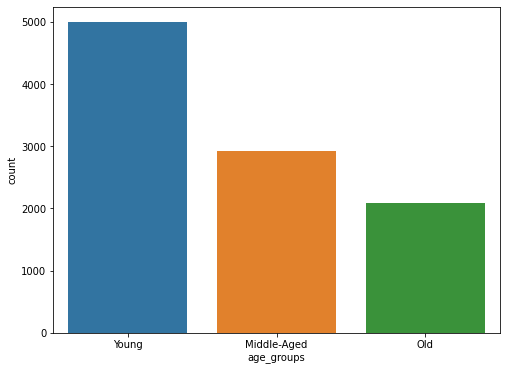

In [11]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = calories , x = "age_groups")

**Data visualization**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

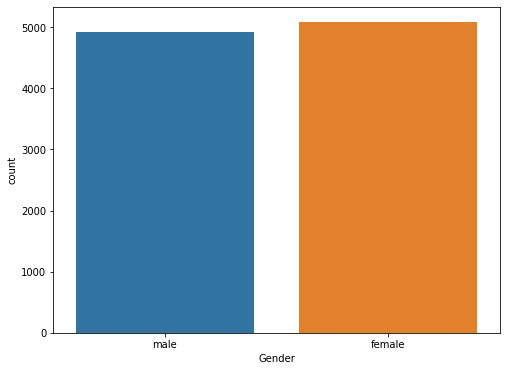

In [12]:
sns.countplot(calories['Gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

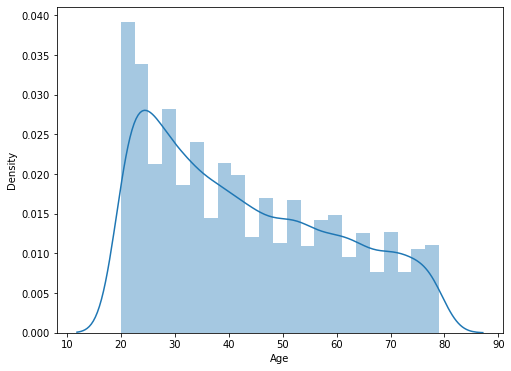

In [13]:
sns.distplot(calories['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

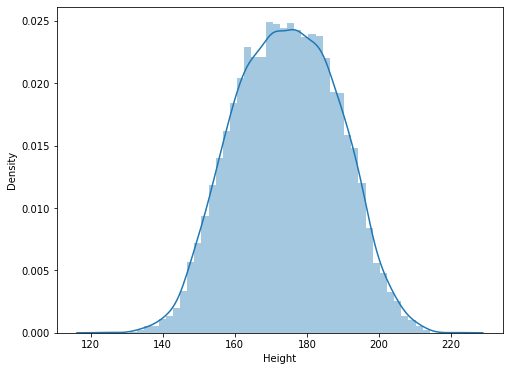

In [14]:
sns.distplot(calories['Height'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

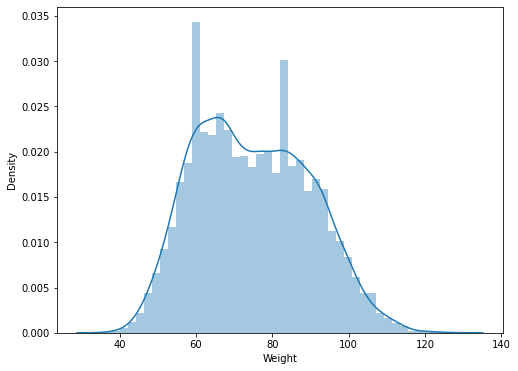

In [15]:
sns.distplot(calories['Weight'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

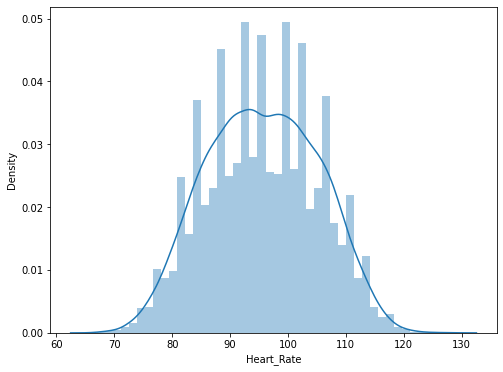

In [16]:
sns.distplot(calories['Heart_Rate'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

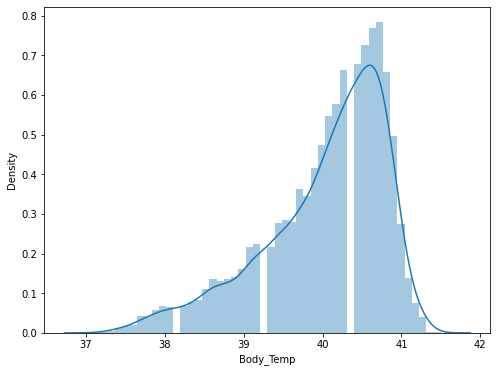

In [17]:
sns.distplot(calories['Body_Temp'])

**Correlation**

<AxesSubplot:>

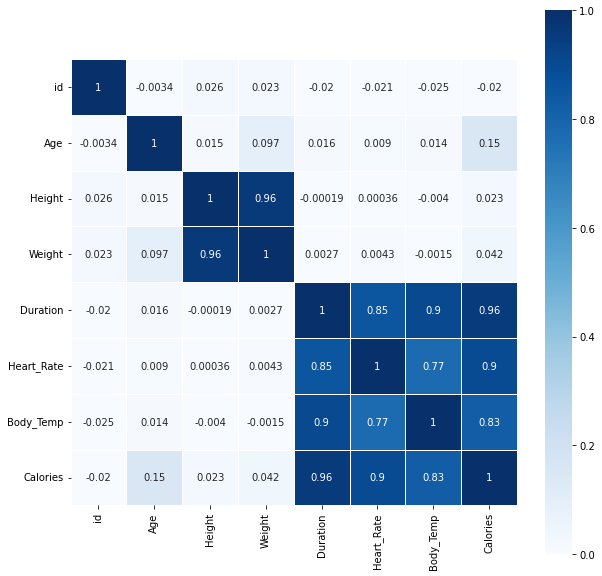

In [18]:
#plt.rcParams["figure.figsize"] = 10, 10
plt.figure(figsize=(10,10))
corr = calories.corr()
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Blues')

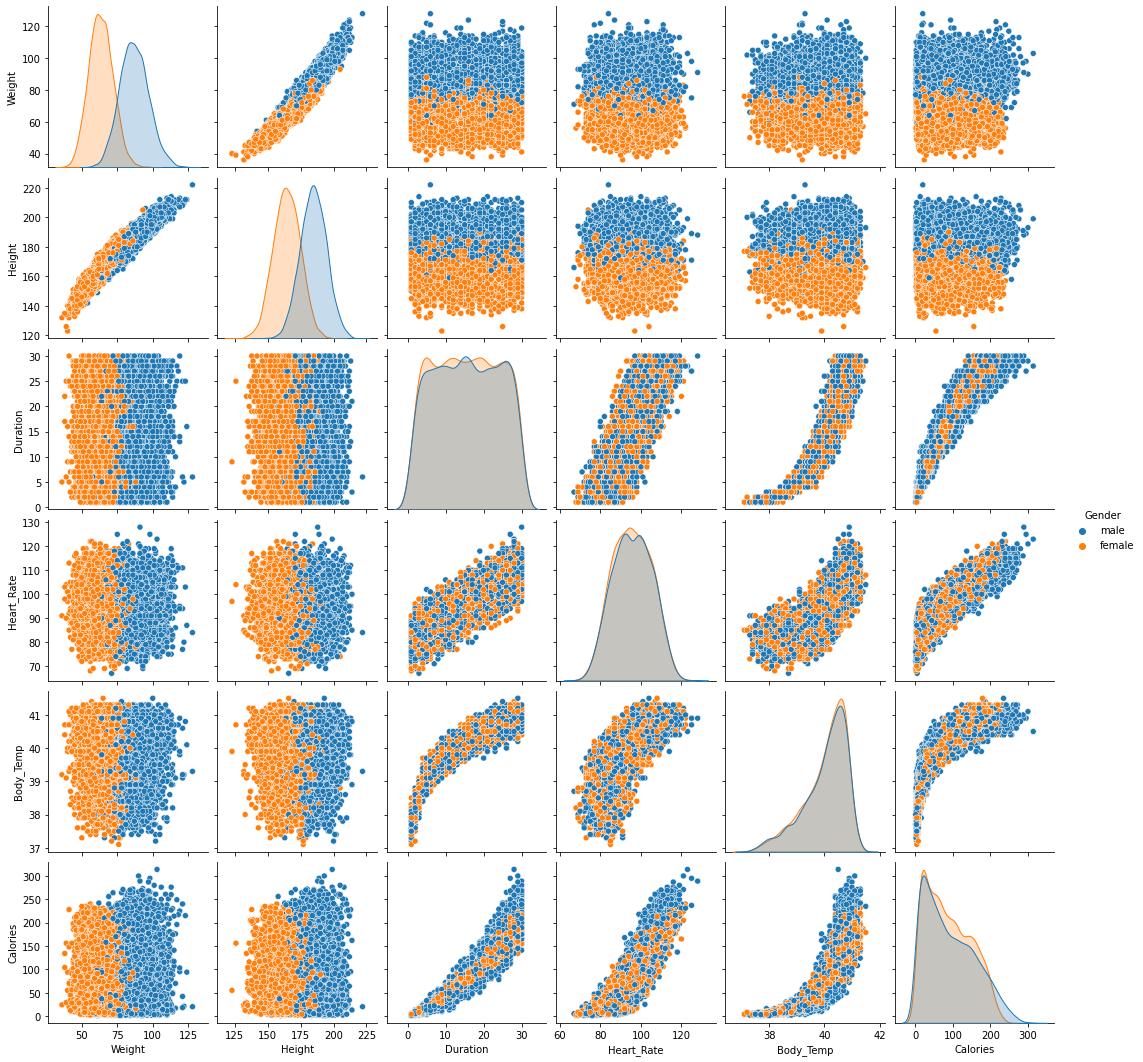

In [19]:
sns.pairplot(calories[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories" , "Gender"]] , hue = "Gender")

In [20]:
calories.replace({"Gender":{'male':0,'female':1}}, inplace=True)
calories.head()

,id,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups
0,1,0,58,187,87,23,111,40.8,190,Middle-Aged
1,2,0,39,165,69,30,108,41.0,195,Young
2,3,1,60,152,54,3,86,38.5,14,Old
3,4,0,22,188,80,11,86,40.1,28,Young
4,5,0,41,178,87,15,83,40.3,48,Middle-Aged


In [21]:
#X = calories.drop('Calories', axis=1)
X = calories.drop(columns=['id','Calories','age_groups'], axis=1)
Y = calories['Calories']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=19)
print(X_train.shape, X_test.shape)

(8000, 7) (2000, 7)


In [23]:
print(X_test)

      Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1921       0   58     197      98        14         102       40.1
530        1   25     167      61        24         107       40.2
3931       0   73     192      92        11          87       40.0
8585       0   20     192      89        10          89       39.6
1937       1   27     167      69        15          90       40.4
...      ...  ...     ...     ...       ...         ...        ...
2444       1   62     182      76        10          82       39.6
6240       0   45     163      72         9          85       39.4
3471       1   50     159      59        30         106       41.1
6488       1   27     164      64         2          89       38.2
1068       0   22     193      99        19          99       40.3

[2000 rows x 7 columns]


**XGBoost Regressor**

In [24]:
from xgboost import XGBRegressor
# loading the model
XGBR = XGBRegressor()
# training the model 
XGBR.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
Y_XGBRpred = XGBR.predict(X_test)
Y_XGBRpred

array([ 95.05539 , 147.48515 ,  54.91256 , ..., 199.37619 ,   8.715875,
        93.55489 ], dtype=float32)

In [26]:
acc_XGBR = XGBR.score(X_test, Y_test)
acc_XGBR

0.9984033243363856

In [27]:
#r2_XGBR = r2_score(Y_test,Y_XGBRpred)
#r2_XGBR

In [28]:
print("XGboost Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_XGBRpred) , 2))
print("XGboost Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_XGBRpred) , 2))
print("XGboost Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_XGBRpred)) , 2))

XGboost Regression Mean Absolute Error(MAE) :  1.65
XGboost Regression Mean Squared Error(MSE) :  6.51
XGboost Regression Root Mean Squared Error(RMSE) :  2.55


**Linear Regression**

In [29]:
from sklearn.linear_model import LinearRegression
# loading the model
LR = LinearRegression()
# training the model 
LR.fit(X_train,Y_train)

LinearRegression()

In [30]:
Y_LRpred = LR.predict(X_test)
Y_LRpred

array([101.00926762, 154.26118159,  59.15119886, ..., 190.50091319,
         8.32313551, 107.75607798])

In [31]:
acc_LR = LR.score(X_test, Y_test)
acc_LR

0.9681583619517649

In [32]:
#r2_LR = r2_score(Y_test,Y_LRpred)
#r2_LR

In [33]:
print("linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_LRpred) , 2))
print("linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_LRpred) , 2))
print("linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_LRpred)) , 2))

linear Regression Mean Absolute Error(MAE) :  8.47
linear Regression Mean Squared Error(MSE) :  129.9
linear Regression Root Mean Squared Error(RMSE) :  11.4


**Bayesian Ridge Regression**

In [34]:
from sklearn.linear_model import BayesianRidge
# loading the model
bayes = BayesianRidge()
# training the model 
bayes.fit(X_train, Y_train)

BayesianRidge()

In [35]:
Y_bayespred = bayes.predict(X_test)
Y_bayespred

array([101.02159695, 154.23035389,  59.17245483, ..., 190.49145806,
         8.28400571, 107.75408497])

In [36]:
acc_BRR = bayes.score(X_test, Y_test)
acc_BRR

0.9681512163854076

In [37]:
#r2_BRR = r2_score(Y_test,Y_bayespred)
#r2_BRR

In [38]:
print("BayesianRidge Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_bayespred) , 2))
print("BayesianRidge Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_bayespred) , 2))
print("BayesianRidge Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_bayespred)) , 2))

BayesianRidge Regression Mean Absolute Error(MAE) :  8.48
BayesianRidge Regression Mean Squared Error(MSE) :  129.93
BayesianRidge Regression Root Mean Squared Error(RMSE) :  11.4


**Random Forest Regressor**

In [39]:
from sklearn.ensemble import RandomForestRegressor
# loading the model
ranfor = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
# training the model 
ranfor.fit(X_train , Y_train)

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=1000)

In [40]:
Y_ranpred = ranfor.predict(X_test)
Y_ranpred

array([ 91.83690784, 145.9942218 ,  51.81953814, ..., 184.19521912,
         9.59196293, 104.48768579])

In [41]:
acc_RFR = ranfor.score(X_test, Y_test)
acc_RFR

0.9846004421787174

In [42]:
#r2_RFR = r2_score(Y_test,Y_ranpred)
#r2_RFR

In [43]:
print("randomforest Regressor Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_ranpred) , 2))
print("randomforest Regressor Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_ranpred) , 2))
print("randomforest Regressor Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_ranpred)) , 2))

randomforest Regressor Mean Absolute Error(MAE) :  5.33
randomforest Regressor Mean Squared Error(MSE) :  62.82
randomforest Regressor Root Mean Squared Error(RMSE) :  7.93


**Decision Tree Regressor**

In [44]:
from sklearn.tree import DecisionTreeRegressor
# loading the model
decis = DecisionTreeRegressor(random_state=19)
# training the model 
decis.fit(X_train , Y_train)

DecisionTreeRegressor(random_state=19)

In [45]:
Y_decispred = decis.predict(X_test)
Y_decispred

array([106., 155.,  52., ..., 194.,   9.,  90.])

In [46]:
acc_DTR = decis.score(X_test, Y_test)
acc_DTR

0.991233510392997

In [47]:
#r2_DTR = r2_score(Y_test,Y_decispred)
#r2_DTR

In [48]:
print("decision Regressor Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_decispred) , 2))
print("decision Regressor Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_decispred) , 2))
print("decision Regressor Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_decispred)) , 2))

decision Regressor Mean Absolute Error(MAE) :  3.81
decision Regressor Mean Squared Error(MSE) :  35.76
decision Regressor Root Mean Squared Error(RMSE) :  5.98


**Support vector Regression**

In [49]:
from sklearn.svm import SVR
# loading the model
svr = SVR(kernel = 'rbf')
# training the model 
svr.fit(X_train , Y_train)

SVR()

In [50]:
Y_svrpred = svr.predict(X_test)
Y_svrpred

array([102.48453717, 135.63945077,  62.69394855, ..., 162.74189317,
        18.90943599,  95.60721741])

In [51]:
acc_SVR = svr.score(X_test, Y_test)
acc_SVR

0.9174583548637524

In [52]:
#r2_SVR = r2_score(Y_test,Y_svrpred)
#r2_SVR

In [53]:
print("support vector Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_svrpred) , 2))
print("support vector Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_svrpred) , 2))
print("support vector Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_svrpred)) , 2))

support vector Regression Mean Absolute Error(MAE) :  12.91
support vector Regression Mean Squared Error(MSE) :  336.72
support vector Regression Root Mean Squared Error(RMSE) :  18.35


**Lasso Regression**

In [54]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [55]:
Y_lassopred = lasso.predict(X_test)
Y_lassopred

array([101.2071813 , 153.68909065,  59.79096122, ..., 190.25661833,
         7.32268778, 107.35761914])

In [56]:
acc_LASSO = lasso.score(X_test, Y_test)
acc_LASSO

0.9679802688622678

In [57]:
#r2_LASSO = r2_score(Y_test,Y_lassopred)
#r2_LASSO

In [58]:
print("Lasso Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_lassopred) , 2))
print("Lasso Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_lassopred) , 2))
print("Lasso Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_lassopred)) , 2))

Lasso Regression Mean Absolute Error(MAE) :  8.49
Lasso Regression Mean Squared Error(MSE) :  130.62
Lasso Regression Root Mean Squared Error(RMSE) :  11.43


**Elastic net Regression**

In [59]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(random_state=0)
elastic.fit(X_train, Y_train)

ElasticNet(random_state=0)

In [60]:
Y_elaspred = elastic.predict(X_test)
Y_elaspred

array([104.72199115, 146.38542931,  64.87959136, ..., 187.34232933,
        -1.18068617, 106.74752455])

In [61]:
acc_ELASTIC = elastic.score(X_test, Y_test)
acc_ELASTIC

0.9597576426354067

In [62]:
#r2_ELASTIC = r2_score(Y_test,Y_elaspred)
#r2_ELASTIC

In [63]:
print("ElasticNet Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(Y_test , Y_elaspred) , 2))
print("ElasticNet Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(Y_test , Y_elaspred) , 2))
print("ElasticNet Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(Y_test , Y_elaspred)) , 2))

ElasticNet Regression Mean Absolute Error(MAE) :  9.69
ElasticNet Regression Mean Squared Error(MSE) :  164.17
ElasticNet Regression Root Mean Squared Error(RMSE) :  12.81


In [64]:
models = ['XGB', 'LR', 'BRR', 'RFR', 'DTR', 'SVR', 'LASSO', 'ELASTIC']
acc_scores = [acc_XGBR,acc_LR,acc_BRR,acc_RFR,acc_DTR,acc_SVR,acc_LASSO,acc_ELASTIC]
print("Models\tAccuracy\n")
for i in range(8):
    print(str(models[i]) + "\t" + str(acc_scores[i]),end='\n')

Models	Accuracy

XGB	0.9984033243363856
LR	0.9681583619517649
BRR	0.9681512163854076
RFR	0.9846004421787174
DTR	0.991233510392997
SVR	0.9174583548637524
LASSO	0.9679802688622678
ELASTIC	0.9597576426354067



------------>We decide from the Bar Graph that the best Model is XGB<------------


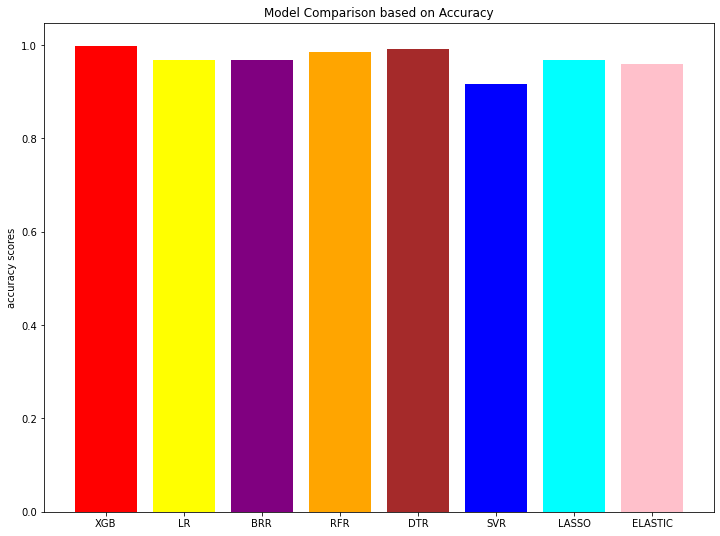

In [65]:
print("\n------------>We decide from the Bar Graph that the best Model is XGB<------------")
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, acc_scores, color=['red','yellow','purple','orange','brown','blue','cyan','pink'])
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

In [66]:
test_data = pd.read_csv("/kaggle/input/iowa-engr2995-2021spring-calories/exercise-test.csv")
test_data.head()

,id,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001,female,66,171,65,28,96,40.6
1,10002,female,63,182,85,6,91,39.4
2,10003,female,48,175,75,11,92,40.0
3,10004,male,35,190,87,14,91,39.9
4,10005,female,49,148,54,29,101,40.8


In [67]:
test_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
X_test_data= test_data.drop('id',axis=1)
X_test_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,66,171,65,28,96,40.6
1,1,63,182,85,6,91,39.4
2,1,48,175,75,11,92,40.0
3,0,35,190,87,14,91,39.9
4,1,49,148,54,29,101,40.8


In [68]:
predicted_calories_burnt = XGBR.predict(X_test_data) 
predicted_calories_burnt 

array([164.83296 ,  28.933603,  53.115696, ..., 163.69737 ,  65.15958 ,
       250.14021 ], dtype=float32)

In [69]:
test_data['Calories'] = predicted_calories_burnt
test_data

,id,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001,1,66,171,65,28,96,40.6,164.832962
1,10002,1,63,182,85,6,91,39.4,28.933603
2,10003,1,48,175,75,11,92,40.0,53.115696
3,10004,0,35,190,87,14,91,39.9,61.174450
4,10005,1,49,148,54,29,101,40.8,173.066208
...,...,...,...,...,...,...,...,...,...
3995,13996,1,27,170,66,24,103,40.8,136.818344
3996,13997,0,26,193,87,5,87,39.2,15.042374
3997,13998,1,22,147,49,27,105,40.7,163.697372
3998,13999,1,59,160,63,13,91,39.8,65.159576


In [70]:
predictions = pd.DataFrame({'ID':test_data.iloc[:,0],'Calories': predicted_calories_burnt})
predictions

,ID,Calories
0,10001,164.832962
1,10002,28.933603
2,10003,53.115696
3,10004,61.174450
4,10005,173.066208
...,...,...
3995,13996,136.818344
3996,13997,15.042374
3997,13998,163.697372
3998,13999,65.159576


In [71]:
predictions.to_csv("calories_burnt_predict.csv",index=False)